In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

Читаем файл курсами валют

In [2]:
currency_df = pd.read_parquet('data/historical_currency_exchange.parquet', engine='fastparquet')

In [4]:
print(currency_df.shape)
currency_df.head(3)

(31, 12)


,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1


In [5]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   AUD     31 non-null     float64       
 2   BRL     31 non-null     float64       
 3   CAD     31 non-null     float64       
 4   EUR     31 non-null     float64       
 5   GBP     31 non-null     float64       
 6   JPY     31 non-null     float64       
 7   MXN     31 non-null     float64       
 8   NGN     31 non-null     float64       
 9   RUB     31 non-null     float64       
 10  SGD     31 non-null     float64       
 11  USD     31 non-null     int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 3.0 KB


In [7]:
currency_df.isna().sum()

date    0
AUD     0
BRL     0
CAD     0
EUR     0
GBP     0
JPY     0
MXN     0
NGN     0
RUB     0
SGD     0
USD     0
dtype: int64

In [10]:
currency_df.describe(include='float')

,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.486451,5.599606,1.373282,0.916183,0.764806,149.313721,19.650422,1640.017070,96.003479,1.308041
std,0.021309,0.104725,0.013313,0.008551,0.006681,2.686216,0.283454,15.192761,1.073514,0.011290
min,1.442917,5.425444,1.348063,0.895591,0.746956,142.573268,19.263497,1619.450022,92.898519,1.280156
25%,1.475624,5.486880,1.360292,0.910902,0.762839,148.544161,19.360603,1630.708907,95.450875,1.303973
50%,1.487595,5.625377,1.377943,0.916792,0.765915,149.168474,19.694724,1639.315783,95.922769,1.308048
75%,1.499793,5.689843,1.382771,0.923870,0.769698,151.214272,19.894018,1643.959480,96.868840,1.316452
max,1.522229,5.761654,1.390965,0.927316,0.773928,153.800613,20.048756,1670.694524,97.501463,1.324596


Читаем файл транзакций

In [11]:
transact_df = pd.read_parquet('data/transaction_fraud_data.parquet', engine='fastparquet')

In [12]:
print(transact_df.shape)
transact_df.head(3)

(7483766, 27)


,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,197.153.60.199,False,False,False,False,1197,3.349856e+07,105,12,1.925481e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,208.123.221.203,True,True,False,True,509,2.011476e+07,100,12,5.149117e+06
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,10.194.159.204,False,False,False,False,332,3.916385e+07,97,12,1.852242e+06


In [14]:
transact_df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'is_fraud', 'last_hour_activity.num_transactions',
       'last_hour_activity.total_amount',
       'last_hour_activity.unique_merchants',
       'last_hour_activity.unique_countries',
       'last_hour_activity.max_single_amount'],
      dtype='object')

In [13]:
transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 27 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   transaction_id                        object        
 1   customer_id                           object        
 2   card_number                           int64         
 3   timestamp                             datetime64[us]
 4   vendor_category                       object        
 5   vendor_type                           object        
 6   vendor                                object        
 7   amount                                float64       
 8   currency                              object        
 9   country                               object        
 10  city                                  object        
 11  city_size                             object        
 12  card_type                             object        
 13  is_card_pres

In [15]:
transact_df.isna().sum()

transaction_id                          0
customer_id                             0
card_number                             0
timestamp                               0
vendor_category                         0
vendor_type                             0
vendor                                  0
amount                                  0
currency                                0
country                                 0
city                                    0
city_size                               0
card_type                               0
is_card_present                         0
device                                  0
channel                                 0
device_fingerprint                      0
ip_address                              0
is_outside_home_country                 0
is_high_risk_vendor                     0
is_weekend                              0
is_fraud                                0
last_hour_activity.num_transactions     0
last_hour_activity.total_amount   

пропущенных значений не найдено

In [30]:
transact_df.nunique()

transaction_id                          7477306
customer_id                                4869
card_number                                5000
timestamp                               7483754
vendor_category                               8
vendor_type                                  17
vendor                                      105
amount                                  2831167
currency                                     11
country                                      12
city                                         11
city_size                                     2
card_type                                     5
is_card_present                               2
device                                        9
channel                                       3
device_fingerprint                       785462
ip_address                              7477187
is_outside_home_country                       2
is_high_risk_vendor                           2
is_weekend                              

In [19]:
transact_df.describe(include='number')

,card_number,amount,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount
count,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
mean,4.222100e+15,4.792468e+04,4.091429e+02,1.991719e+07,8.002226e+01,1.066260e+01,1.726432e+06
std,2.341170e+15,1.775562e+05,3.910964e+02,3.565890e+07,3.047287e+01,2.617777e+00,1.398325e+06
min,3.700086e+14,1.000000e-02,0.000000e+00,1.454232e-02,0.000000e+00,0.000000e+00,1.454232e-02
25%,4.004400e+15,3.635300e+02,1.050000e+02,3.367823e+06,6.300000e+01,1.100000e+01,8.015712e+05
50%,5.010745e+15,1.177450e+03,2.920000e+02,1.017851e+07,9.500000e+01,1.200000e+01,1.235738e+06
75%,5.999914e+15,2.242953e+04,6.060000e+02,2.273432e+07,1.040000e+02,1.200000e+01,2.290742e+06
max,6.999728e+15,6.253153e+06,3.962000e+03,1.072915e+09,1.050000e+02,1.200000e+01,6.253153e+06


### Среднее мошеннических транзакций

In [26]:
print(f'Кол-во всего транзакций: {transact_df['transaction_id'].count()}')
print('Кол-во уникальных транзакций:', transact_df['transaction_id'].nunique())

Кол-во всего транзакций: 7483766
Кол-во уникальных транзакций: 7477306


In [29]:
transact_df['is_fraud'].unique()

array([False,  True])

In [35]:
print('Среднее мошеннических транзакций:', transact_df['is_fraud'].mean())

Среднее мошеннических транзакций: 0.19972818498066347


In [36]:
transact_df['is_fraud'].value_counts()

is_fraud
False    5989047
True     1494719
Name: count, dtype: int64

In [39]:
total = len(transact_df)
fraud_count = transact_df['is_fraud'].sum()
legitimate_count = total - fraud_count
fraud_ratio = fraud_count / total

print(f"Общее количество транзакций: {total:,}")
print(f"Мошеннические транзакции: {fraud_count:,}")
print(f"Легитимные транзакции: {legitimate_count:,}")
print(f"Доля мошеннических: {fraud_ratio:.2f} ({fraud_ratio * 100:.2f}%)")

Общее количество транзакций: 7,483,766
Мошеннические транзакции: 1,494,719
Легитимные транзакции: 5,989,047
Доля мошеннических: 0.20 (19.97%)


In [41]:
# находим дублированные transaction_id
duplicated_transactions = transact_df[transact_df.duplicated(subset=['transaction_id'], keep=False)]
print(f"Количество строк с дублированными ID: {len(duplicated_transactions)}")

# смотрим примеры дубликатов
sample_duplicates = duplicated_transactions.groupby('transaction_id').head(2)
print(sample_duplicates[['transaction_id', 'amount', 'is_fraud', 'timestamp']].head(10))

Количество строк с дублированными ID: 12913
     transaction_id     amount  is_fraud                  timestamp
1490    TX_87660936     513.45      True 2024-09-30 00:17:28.217573
1678    TX_fb4eb4bb      86.02     False 2024-09-30 00:19:28.942167
2210    TX_3ce26d57     107.16     False 2024-09-30 00:25:46.654336
2432    TX_093ab599     833.79     False 2024-09-30 00:28:21.715931
2868    TX_e64012a3     205.15     False 2024-09-30 00:33:31.100514
3193    TX_2fa39302  212114.73     False 2024-09-30 00:37:17.967209
3625    TX_c3e75e19   29778.73     False 2024-09-30 00:42:33.776014
3734    TX_5b629f36     468.05     False 2024-09-30 00:44:05.485204
4287    TX_895d5416   21620.59      True 2024-09-30 00:50:49.479786
4804    TX_4dabaec0     475.58     False 2024-09-30 00:57:08.731461


In [42]:
# берем только первое вхождение каждого transaction_id
unique_transactions = transact_df.drop_duplicates(subset=['transaction_id'])
fraud_ratio_unique = unique_transactions['is_fraud'].mean()
print(f"Доля по уникальным транзакциям: {fraud_ratio_unique:.6f} ({fraud_ratio_unique * 100:.4f}%)")

Доля по уникальным транзакциям: 0.199730 (19.9730%)


получился почти такой же результат

АНАЛИЗ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ
--------------------------------------------------
Легитимные: 5,989,047 (80.03%)
Мошеннические: 1,494,719 (19.97%)
Соотношение мошенничества: 1:4


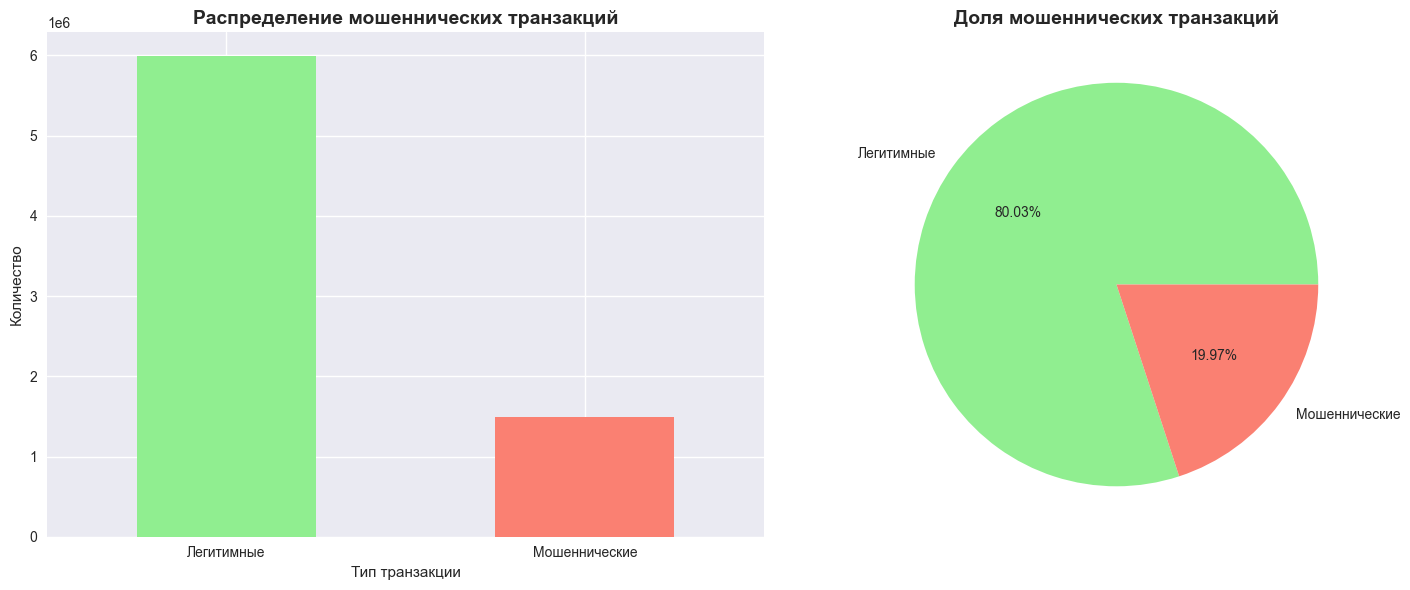

In [139]:
print("АНАЛИЗ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ")
print("-" * 50)
fraud_stats = transact_df['is_fraud'].value_counts()
fraud_pct = transact_df['is_fraud'].value_counts(normalize=True) * 100

print(f"Легитимные: {fraud_stats[False]:,} ({fraud_pct[False]:.2f}%)")
print(f"Мошеннические: {fraud_stats[True]:,} ({fraud_pct[True]:.2f}%)")
print(f"Соотношение мошенничества: 1:{fraud_stats[False]//fraud_stats[True]}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# график распределения is_fraud
fraud_stats.plot(kind='bar', ax=axes[0], color=['lightgreen', 'salmon'])
axes[0].set_title('Распределение мошеннических транзакций', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Тип транзакции')
axes[0].set_ylabel('Количество')
axes[0].set_xticklabels(['Легитимные', 'Мошеннические'], rotation=0)

# pie chart
axes[1].pie(fraud_stats.values, labels=['Легитимные', 'Мошеннические'], 
           autopct='%1.2f%%', colors=['lightgreen', 'salmon'])
axes[1].set_title('Доля мошеннических транзакций', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### В каких топ-5 странах зафиксировано больше всего мошеннических транзакций?


In [43]:
# сначала убираем дубликаты, потом фильтруем мошеннические
unique_transactions = transact_df.drop_duplicates(subset=['transaction_id'])
fraud_unique = unique_transactions[unique_transactions['is_fraud'] == True]

# группируем по странам
fraud_by_country_unique = fraud_unique['country'].value_counts().head(5)

print("Топ-5 стран по количеству мошеннических транзакций (уникальные):")
print(fraud_by_country_unique)
print(f"\nОбщее количество уникальных мошеннических транзакций: {len(fraud_unique):,}")

Топ-5 стран по количеству мошеннических транзакций (уникальные):
country
Russia       299176
Mexico       298579
Brazil       298381
Nigeria      298358
Australia     37618
Name: count, dtype: int64

Общее количество уникальных мошеннических транзакций: 1,493,446


In [53]:
','.join(fraud_by_country_unique.keys())

'Russia,Mexico,Brazil,Nigeria,Australia'

In [54]:
# попробуем не убирать дубликаты
# фильтруем только мошеннические транзакции
fraud_transactions = transact_df[transact_df['is_fraud'] == True]

# группируем по странам и считаем количество
fraud_by_country = fraud_transactions['country'].value_counts().head(5)

print("Топ-5 стран по количеству мошеннических транзакций (все строки):")
print(fraud_by_country)
print(f"\nОбщее количество мошеннических транзакций: {len(fraud_transactions):,}")

Топ-5 стран по количеству мошеннических транзакций (все строки):
country
Russia       299425
Mexico       298841
Brazil       298629
Nigeria      298600
Australia     37652
Name: count, dtype: int64

Общее количество мошеннических транзакций: 1,494,719


In [55]:
','.join(fraud_by_country.keys())

'Russia,Mexico,Brazil,Nigeria,Australia'

### Сколько транзакций в среднем совершает один клиент за час?

In [60]:
# удаляем дубликаты
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# добавляем час к timestamp для группировки
unique_df = unique_df.copy()
unique_df['hour_period'] = unique_df['timestamp'].dt.floor('H')  # округляем до часа

# группируем по клиенту и часу, считаем транзакции
hourly_activity = unique_df.groupby(['customer_id', 'hour_period']).size().reset_index(name='transactions_count')

# считаем среднее количество транзакций за час на клиента
avg_transactions_per_hour = hourly_activity['transactions_count'].mean()
print(f"Среднее кол-во транзакций за час: {avg_transactions_per_hour:.2f}")

# дополнительная статистика
print(f"Медиана: {hourly_activity['transactions_count'].median():.2f}")
print(f"Максимум за час: {hourly_activity['transactions_count'].max()}")
print(f"Минимум за час: {hourly_activity['transactions_count'].min()}")

C:\Users\sandzhi\AppData\Local\Temp\ipykernel_13956\778995551.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  unique_df['hour_period'] = unique_df['timestamp'].dt.floor('H')  # округляем до часа


Среднее кол-во транзакций за час: 2.45
Медиана: 2.00
Максимум за час: 17
Минимум за час: 1


In [61]:
# анализ по клиентам - сколько часов они были активны и сколько транзакций сделали
client_stats = unique_df.groupby('customer_id').agg({
    'timestamp': ['count', 'nunique'],  # общее кол-во транзакций и уникальных timestamp
    'hour_period': 'nunique'  # в скольких разных часах был активен
}).round(2)

client_stats.columns = ['total_transactions', 'unique_timestamps', 'active_hours']

# среднее кол-во транзакций за час для каждого клиента
client_stats['avg_per_hour'] = client_stats['total_transactions'] / client_stats['active_hours']

print("Статистика по клиентам:")
print(client_stats['avg_per_hour'].describe())
print(f"\nОбщее среднее транзакций за час: {client_stats['avg_per_hour'].mean():.2f}")

Статистика по клиентам:
count    4869.000000
mean        2.424927
std         0.436122
min         1.803957
25%         2.117647
50%         2.378882
75%         2.662632
max         5.473397
Name: avg_per_hour, dtype: float64

Общее среднее транзакций за час: 2.42


In [62]:
# дополнительно
# смотрим сколько клиентов делают разное количество транзакций за час
activity_distribution = hourly_activity['transactions_count'].value_counts().sort_index()
print("\nРаспределение: сколько транзакций за час делают клиенты:")
print(activity_distribution.head(10))

# процент клиентов с высокой активностью (>10 транзакций в час)
high_activity = hourly_activity[hourly_activity['transactions_count'] > 10]
high_activity_percent = len(high_activity) / len(hourly_activity) * 100
print(f"\nПроцент часов с >10 транзакциями: {high_activity_percent:.2f}%")


Распределение: сколько транзакций за час делают клиенты:
transactions_count
1     951486
2     879615
3     599961
4     334146
5     163425
6      71855
7      30068
8      11887
9       4708
10      1950
Name: count, dtype: int64

Процент часов с >10 транзакциями: 0.04%


### Какова доля мошенничества среди транзакций у продавцов с высоким риском (is_high_risk_vendor=True)?

In [63]:
# используем уникальные транзакции (без дубликатов)
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# фильтруем транзакции у высоко-рисковых продавцов
high_risk_transactions = unique_df[unique_df['is_high_risk_vendor'] == True]

# считаем долю мошенничества у высоко-рисковых продавцов
fraud_rate_high_risk = high_risk_transactions['is_fraud'].mean()

print(f"Доля мошенничества у высоко-рисковых продавцов: {fraud_rate_high_risk:.6f} ({fraud_rate_high_risk * 100:.4f}%)")
print(f"Количество транзакций у высоко-рисковых продавцов: {len(high_risk_transactions):,}")
print(f"Из них мошеннических: {high_risk_transactions['is_fraud'].sum():,}")

Доля мошенничества у высоко-рисковых продавцов: 0.200000 (20.0000%)
Количество транзакций у высоко-рисковых продавцов: 1,870,408
Из них мошеннических: 374,082


In [64]:
# Сравнение с низко-рисковыми продавцами:
# низко-рисковые продавцы
low_risk_transactions = unique_df[unique_df['is_high_risk_vendor'] == False]
fraud_rate_low_risk = low_risk_transactions['is_fraud'].mean()

# общая статистика для сравнения
overall_fraud_rate = unique_df['is_fraud'].mean()

print(f"\nСравнение:")
print(f"Высоко-рисковые продавцы: {fraud_rate_high_risk * 100:.4f}%")
print(f"Низко-рисковые продавцы: {fraud_rate_low_risk * 100:.4f}%") 
print(f"Общая доля мошенничества: {overall_fraud_rate * 100:.4f}%")

# во сколько раз выше риск
risk_multiplier = fraud_rate_high_risk / fraud_rate_low_risk if fraud_rate_low_risk > 0 else 0
print(f"\nВысоко-рисковые продавцы в {risk_multiplier:.2f} раз опаснее")


Сравнение:
Высоко-рисковые продавцы: 20.0000%
Низко-рисковые продавцы: 19.9641%
Общая доля мошенничества: 19.9730%

Высоко-рисковые продавцы в 1.00 раз опаснее


In [ ]:
# создаем сводную таблицу
risk_analysis = unique_df.groupby('is_high_risk_vendor')['is_fraud'].agg([
    'count', # общее количество транзакций
    'sum',  # количество мошеннических
    'mean' # доля мошеннических
]).round(6)

risk_analysis.columns = ['total_transactions', 'fraud_transactions', 'fraud_rate']
risk_analysis['fraud_percentage'] = risk_analysis['fraud_rate'] * 100

print("\nДетальная сводка по типам продавцов:")
risk_analysis


Детальная сводка по типам продавцов:


,total_transactions,fraud_transactions,fraud_rate,fraud_percentage
is_high_risk_vendor,,,,
False,5606898,1119364,0.199641,19.9641
True,1870408,374082,0.200000,20.0000


In [67]:
# статистическая значимость различий:
# проверяем распределение
print(f"\nРаспределение продавцов по риску:")
vendor_risk_dist = unique_df['is_high_risk_vendor'].value_counts()
print(vendor_risk_dist)
print(f"Доля высоко-рисковых продавцов: {vendor_risk_dist[True] / len(unique_df) * 100:.2f}%")


Распределение продавцов по риску:
is_high_risk_vendor
False    5606898
True     1870408
Name: count, dtype: int64
Доля высоко-рисковых продавцов: 25.01%


### В каком городе наибольшая средняя сумма транзакций?

In [70]:
# удлаяем дубликаты
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# группируем по городам и считаем статистику
city_stats = unique_df.groupby('city')['amount'].agg([
    'mean',  # средняя сумма
    'count',  # количество транзакций
    'sum',  # общая сумма
    'median'  # медиана для сравнения
]).round(2)

city_stats.columns = ['avg_amount', 'transaction_count', 'total_amount', 'median_amount']

# сортируем по средней сумме
city_stats_sorted = city_stats.sort_values('avg_amount', ascending=False)

print("Топ-10 городов по средней сумме транзакций:")
print(city_stats_sorted.head(10))

print(f"\nГород с наибольшей средней суммой: {city_stats_sorted.index[0]}")
print(f"Средняя сумма: {city_stats_sorted.iloc[0]['avg_amount']:,.2f}")

Топ-10 городов по средней сумме транзакций:
              avg_amount  transaction_count  total_amount  median_amount
city                                                                    
Unknown City    51318.09            6977703  3.580824e+11        1467.67
New York          568.86              49754  2.830325e+07         425.08
San Antonio       567.99              50031  2.841713e+07         425.27
San Jose          567.20              49974  2.834502e+07         423.95
Phoenix           565.76              50283  2.844831e+07         421.45
San Diego         565.55              50380  2.849229e+07         423.20
Chicago           565.24              49853  2.817870e+07         423.41
Houston           564.93              49915  2.819840e+07         423.00
Los Angeles       563.90              49453  2.788665e+07         424.23
Philadelphia      563.50              49870  2.810155e+07         424.92

Город с наибольшей средней суммой: Unknown City
Средняя сумма: 51,318.09


берем New York, так как Unknown City неизвестен

Дополнительно посмотрим

In [73]:
# детальный анализ топ-города
top_city = city_stats_sorted.index[1]
top_city_data = unique_df[unique_df['city'] == top_city]

print(f"\nДетальная информация о городе {top_city}:")
print(f"Количество транзакций: {len(top_city_data):,}")
print(f"Средняя сумма: {top_city_data['amount'].mean():,.2f}")
print(f"Медиана: {top_city_data['amount'].median():,.2f}")
print(f"Минимум: {top_city_data['amount'].min():,.2f}")
print(f"Максимум: {top_city_data['amount'].max():,.2f}")
print(f"Стандартное отклонение: {top_city_data['amount'].std():,.2f}")


Детальная информация о городе New York:
Количество транзакций: 49,754
Средняя сумма: 568.86
Медиана: 425.08
Минимум: 0.01
Максимум: 14,962.01
Стандартное отклонение: 619.72


In [75]:
# сравнение с общей статистикой
overall_avg = unique_df['amount'].mean()
print(f"\nСравнение:")
print(f"Средняя сумма в {top_city}: {city_stats_sorted.iloc[0]['avg_amount']:,.2f}")
print(f"Общая средняя сумма: {overall_avg:,.2f}")
print(f"Разница: в {city_stats_sorted.iloc[0]['avg_amount'] / overall_avg:.2f} выше среднего")


Сравнение:
Средняя сумма в New York: 51,318.09
Общая средняя сумма: 47,927.01
Разница: в 1.07 выше среднего


In [76]:
# анализ по размеру города
# смотрим как связан размер города со средней суммой
city_size_analysis = unique_df.groupby(['city_size'])['amount'].agg([
    'mean', 'count', 'median'
]).round(2)

print(f"\nСтатистика по размерам городов:")
print(city_size_analysis)

# анализ для топ-города
top_city_size = unique_df[unique_df['city'] == top_city]['city_size'].iloc[0]
print(f"\nРазмер топ-города ({top_city}): {top_city_size}")


Статистика по размерам городов:
               mean    count   median
city_size                            
large        565.73   198975   423.91
medium     49221.77  7278331  1276.85

Размер топ-города (New York): large


In [78]:
# проверка на выбросы
# проверяем, не искажают ли результат очень большие транзакции
print(f"\nРаспределение сумм в топ-городе ({top_city}):")
amount_distribution = top_city_data['amount'].describe()
print(amount_distribution)

# топ-5 самых больших транзакций в этом городе
print(f"\nТоп-5 крупнейших транзакций в {top_city}:")
top_transactions = top_city_data.nlargest(5, 'amount')[['amount', 'vendor', 'is_fraud']]
print(top_transactions)


Распределение сумм в топ-городе (New York):
count    49754.000000
mean       568.863799
std        619.715501
min          0.010000
25%        250.122500
50%        425.080000
75%        635.680000
max      14962.010000
Name: amount, dtype: float64

Топ-5 крупнейших транзакций в New York:
           amount       vendor  is_fraud
1784488  14962.01      Expedia      True
5694400  14756.29       Airbnb      True
4368239  14691.75       Airbnb      True
3451916  14179.13      Expedia      True
244257   13885.84  Booking.com      True


In [79]:
# дополнтельно - города с наибольними оборотом
print(f"\nТоп-5 городов по общему обороту:")
top_turnover = city_stats_sorted.sort_values('total_amount', ascending=False).head(5)
print(top_turnover[['avg_amount', 'transaction_count', 'total_amount']])


Топ-5 городов по общему обороту:
              avg_amount  transaction_count  total_amount
city                                                     
Unknown City    51318.09            6977703  3.580824e+11
San Diego         565.55              50380  2.849229e+07
Phoenix           565.76              50283  2.844831e+07
San Antonio       567.99              50031  2.841713e+07
San Jose          567.20              49974  2.834502e+07


### В каком городе выше всего средний чек по операциям, связанным с fast_food?

In [80]:
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

print("Уникальные категории продавцов:")
print(unique_df['vendor_category'].unique())

print("\nУникальные типы продавцов:")
print(unique_df['vendor_type'].unique())

Уникальные категории продавцов:
['Restaurant' 'Entertainment' 'Grocery' 'Gas' 'Healthcare' 'Education'
 'Travel' 'Retail']

Уникальные типы продавцов:
['fast_food' 'gaming' 'physical' 'major' 'medical' 'online' 'hotels'
 'pharmacy' 'premium' 'events' 'supplies' 'airlines' 'local' 'booking'
 'streaming' 'transport' 'casual']


значит берем vendor_type

In [83]:
# удаляем дубликаты
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# фильтруем транзакции fast_food
fast_food_transactions = unique_df[unique_df['vendor_type'] == 'fast_food']

print(f"Найдено транзакций fast_food: {len(fast_food_transactions):,}")

# группируем по городам и считаем статистику
fast_food_by_city = fast_food_transactions.groupby('city')['amount'].agg([
    'mean',  # средний чек
    'count',  # количество транзакций
    'sum',  # общий оборот
    'median',  # медиана
    'std'  # стандартное отклонение
]).round(2)

fast_food_by_city.columns = ['avg_check', 'transactions', 'total_amount', 'median_check', 'std_dev']

# сортируем по среднему чеку
fast_food_sorted = fast_food_by_city.sort_values('avg_check', ascending=False)

print("\nТоп-10 городов по среднему чеку в fast_food:")
print(fast_food_sorted.head(10))

print(f"\nГород с наибольшим средним чеком: {fast_food_sorted.index[0]}")
print(f"Средний чек: {fast_food_sorted.iloc[0]['avg_check']:,.2f}")

Найдено транзакций fast_food: 312,504

Топ-10 городов по среднему чеку в fast_food:
              avg_check  transactions  total_amount  median_check   std_dev
city                                                                       
Unknown City   15213.20        291843  4.439866e+09        577.42  56676.92
Chicago          264.61          2027  5.363657e+05        124.88    354.92
New York         263.30          2054  5.408109e+05        121.18    355.45
San Antonio      258.17          2104  5.431890e+05        119.72    344.63
Los Angeles      255.93          2095  5.361809e+05        124.54    349.19
San Diego        253.38          2046  5.184101e+05        123.25    339.55
Dallas           248.96          2082  5.183387e+05        118.96    342.57
San Jose         248.06          2016  5.000860e+05        119.76    327.73
Houston          247.02          2088  5.157808e+05        124.36    334.46
Philadelphia     243.52          2031  4.945869e+05        118.57    330.94

Гор

тут снова Unknown City на 1 месте. Берем известный город Chicago          

In [90]:
# дополнительно
# детальный анализ топ-города:
top_city = fast_food_sorted.index[1]
top_city_fast_food = fast_food_transactions[fast_food_transactions['city'] == top_city]

print(f"\nДетальная информация о fast_food в городе {top_city}:\n")
print(f"Количество транзакций: {len(top_city_fast_food):,}")
print(f"Средний чек: {top_city_fast_food['amount'].mean():,.2f}")
print(f"Медиана чека: {top_city_fast_food['amount'].median():,.2f}")
print(f"Минимальный чек: {top_city_fast_food['amount'].min():,.2f}")
print(f"Максимальный чек: {top_city_fast_food['amount'].max():,.2f}")
print(f"Стандартное отклонение: {top_city_fast_food['amount'].std():,.2f}")

# топ fast_food заведений в этом городе
print(f"\nТоп-5 fast_food заведений в {top_city}:\n")
top_vendors = top_city_fast_food['vendor'].value_counts().head(5)
for vendor, count in top_vendors.items():
    avg_check_vendor = top_city_fast_food[top_city_fast_food['vendor'] == vendor]['amount'].mean()
    print(f"{vendor}: {count} транзакций, средний чек {avg_check_vendor:.2f}")


Детальная информация о fast_food в городе Chicago:

Количество транзакций: 2,027
Средний чек: 264.61
Медиана чека: 124.88
Минимальный чек: 0.29
Максимальный чек: 2,383.78
Стандартное отклонение: 354.92

Топ-5 fast_food заведений в Chicago:

KFC: 368 транзакций, средний чек 252.18
Wendy's: 339 транзакций, средний чек 246.84
Taco Bell: 337 транзакций, средний чек 274.99
Subway: 332 транзакций, средний чек 245.74
McDonald's: 330 транзакций, средний чек 288.63


In [92]:
# общая статистика по fast_food
overall_fast_food_avg = fast_food_transactions['amount'].mean()

# средний чек всех категорий в топ-городе
top_city_all_transactions = unique_df[unique_df['city'] == top_city]
top_city_overall_avg = top_city_all_transactions['amount'].mean()

print(f"\nСравнение:")
print(f"Fast_food средний чек в {top_city}: {fast_food_sorted.iloc[0]['avg_check']:,.2f}")
print(f"Общий средний чек fast_food: {overall_fast_food_avg:,.2f}")
print(f"Все категории в {top_city}: {top_city_overall_avg:,.2f}")
print(f"Fast_food выше общего в {fast_food_sorted.iloc[0]['avg_check'] / overall_fast_food_avg:.2f} раз")


Сравнение:
Fast_food средний чек в Chicago: 15,213.20
Общий средний чек fast_food: 14,224.08
Все категории в Chicago: 565.24
Fast_food выше общего в 1.07 раз


In [94]:
# Анализ по размеру города:
# связь размера города с средним чеком fast_food
# размер топ-города
top_city_size = unique_df[unique_df['city'] == top_city]['city_size'].iloc[0]
print(f"\nРазмер города {top_city}: {top_city_size}")

fast_food_by_size = fast_food_transactions.groupby('city_size')['amount'].agg([
    'mean', 'count', 'median'
]).round(2)

print(f"\nСредний чек fast_food по размеру города:")
print(fast_food_by_size)



Размер города Chicago: large

Средний чек fast_food по размеру города:
               mean   count  median
city_size                          
large        257.64    8264  123.68
medium     14603.45  304240  511.76


In [95]:
# Проверка на выбросы:
# проверяем распределение чеков в топ-городе
print(f"\nРаспределение чеков fast_food в {top_city}:")
print(top_city_fast_food['amount'].describe())

# проверяем, не искажают ли крупные транзакции результат
print(f"\nТоп-5 крупнейших чеков fast_food в {top_city}:")
largest_checks = top_city_fast_food.nlargest(5, 'amount')[['amount', 'vendor', 'is_fraud']]
print(largest_checks)

# доля мошенничества в fast_food этого города
fraud_rate = top_city_fast_food['is_fraud'].mean() * 100
print(f"\nДоля мошенничества в fast_food ({top_city}): {fraud_rate:.2f}%")


Распределение чеков fast_food в Chicago:
count    2027.000000
mean      264.610627
std       354.924171
min         0.290000
25%        60.935000
50%       124.880000
75%       296.825000
max      2383.780000
Name: amount, dtype: float64

Топ-5 крупнейших чеков fast_food в Chicago:
          amount       vendor  is_fraud
6469048  2383.78    Taco Bell     False
4310970  2317.44  Burger King     False
353698   2207.16      Wendy's     False
4522766  2136.08      Wendy's     False
5778148  2098.41   McDonald's     False

Доля мошенничества в fast_food (Chicago): 6.96%


In [96]:
# города с наибольшим оборотом fast_food:
print(f"\nТоп-5 городов по общему обороту fast_food:")
top_turnover = fast_food_sorted.sort_values('total_amount', ascending=False).head(5)
print(top_turnover[['avg_check', 'transactions', 'total_amount']])


Топ-5 городов по общему обороту fast_food:
              avg_check  transactions  total_amount
city                                               
Unknown City   15213.20        291843  4.439866e+09
San Antonio      258.17          2104  5.431890e+05
New York         263.30          2054  5.408109e+05
Chicago          264.61          2027  5.363657e+05
Los Angeles      255.93          2095  5.361809e+05


### Каково среднее для всех немошеннических операций при пересчете в доллары США?

In [100]:
transact_df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'is_fraud', 'last_hour_activity.num_transactions',
       'last_hour_activity.total_amount',
       'last_hour_activity.unique_merchants',
       'last_hour_activity.unique_countries',
       'last_hour_activity.max_single_amount'],
      dtype='object')

In [101]:
# Исследуем валюты в транзакциях:
# используем уникальные транзакции
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

print("Валюты в транзакциях:")
print(unique_df['currency'].value_counts())
currency_field = 'currency'

print(f"\nДиапазон дат в транзакциях:")
print(f"От: {unique_df['timestamp'].min()}")
print(f"До: {unique_df['timestamp'].max()}")

Валюты в транзакциях:
currency
EUR    1064830
NGN     849115
BRL     804119
RUB     793077
MXN     785019
SGD     588147
GBP     538040
CAD     532201
JPY     526927
USD     499603
AUD     496228
Name: count, dtype: int64

Диапазон дат в транзакциях:
От: 2024-09-30 00:00:01.034820
До: 2024-10-30 23:59:59.101885


In [102]:
currency_df.head(3)

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1


In [103]:
# Подготавливаем данные курсов для соединения:
# преобразуем wide формат в long для удобства соединения
currency_long = currency_df.melt(
    id_vars=['date'], 
    var_name='currency', 
    value_name='usd_rate'
)

print("Структура курсов в long формате:")
print(currency_long.head())
print(f"\nВсего записей курсов: {len(currency_long)}")

Структура курсов в long формате:
        date currency  usd_rate
0 2024-09-30      AUD  1.443654
1 2024-10-01      AUD  1.442917
2 2024-10-02      AUD  1.449505
3 2024-10-03      AUD  1.456279
4 2024-10-04      AUD  1.460930

Всего записей курсов: 341


In [104]:
# Соединяем транзакции с курсами:
# подготавливаем дату для соединения (без времени)
unique_df = unique_df.copy()
unique_df['date_only'] = unique_df['timestamp'].dt.date

currency_long = currency_long.copy()  
currency_long['date_only'] = currency_long['date'].dt.date

# соединяем по дате и валюте
merged_df = pd.merge(
    unique_df,
    currency_long,
    left_on=['date_only', currency_field],
    right_on=['date_only', 'currency'],
    how='left'
)

print(f"Транзакций после соединения: {len(merged_df)}")
print(f"Транзакций без курса: {merged_df['usd_rate'].isna().sum()}")

Транзакций после соединения: 7477306
Транзакций без курса: 0


In [105]:
# Рассчитываем точные суммы в USD:
# фильтруем немошеннические транзакции
non_fraud_merged = merged_df[merged_df['is_fraud'] == False].copy()

print(f"Немошеннических транзакций: {len(non_fraud_merged)}")

# конвертируем в USD
# если валюта USD, то курс = 1, сумма остается той же
# если другая валюта, то amount_usd = amount / usd_rate
# (так как usd_rate показывает сколько единиц валюты за 1 USD)

non_fraud_merged['amount_usd'] = non_fraud_merged.apply(
    lambda row: row['amount'] if row[currency_field] == 'USD' 
    else row['amount'] / row['usd_rate'] if pd.notna(row['usd_rate']) and row['usd_rate'] != 0
    else None, axis=1
)

# убираем строки где не удалось конвертировать
valid_conversions = non_fraud_merged['amount_usd'].notna()
non_fraud_usd = non_fraud_merged[valid_conversions]

print(f"Успешно конвертировано транзакций: {len(non_fraud_usd)}")

# считаем среднее
avg_usd = non_fraud_usd['amount_usd'].mean()

print(f"\nСреднее немошеннических операций в USD: {avg_usd:.2f}")

Немошеннических транзакций: 5983860
Успешно конвертировано транзакций: 5983860

Среднее немошеннических операций в USD: 459.79


In [106]:
# Подробная статистика:
print("\nПодробная статистика немошеннических операций в USD:")
usd_stats = non_fraud_usd['amount_usd'].describe()
print(usd_stats.round(2))

print(f"\nДополнительно:")
print(f"Медиана: {non_fraud_usd['amount_usd'].median():.2f}")
print(f"Общая сумма: {non_fraud_usd['amount_usd'].sum():,.2f}")
print(f"Стандартное отклонение: {non_fraud_usd['amount_usd'].std():.2f}")


Подробная статистика немошеннических операций в USD:
count    5983860.00
mean         459.79
std          417.02
min            6.23
25%          192.31
50%          354.54
75%          528.78
max         3170.58
Name: amount_usd, dtype: float64

Дополнительно:
Медиана: 354.54
Общая сумма: 2,751,326,692.25
Стандартное отклонение: 417.02


In [107]:
# Анализ по валютам:
# статистика по валютам
currency_stats = non_fraud_usd.groupby(currency_field)['amount_usd'].agg([
    'count', 'mean', 'sum', 'median'
]).round(2)

currency_stats.columns = ['transactions', 'avg_usd', 'total_usd', 'median_usd']

print(f"\nСтатистика по валютам (немошеннические в USD):")
print(currency_stats.sort_values('avg_usd', ascending=False))

# показываем примеры конвертации
print(f"\nПримеры конвертации (первые 5 строк):")
examples = non_fraud_usd[['amount', currency_field, 'usd_rate', 'amount_usd']].head()
print(examples.round(4))


Статистика по валютам (немошеннические в USD):
          transactions  avg_usd     total_usd  median_usd
currency                                                 
SGD             550771   578.67  3.187120e+08      443.34
MXN             486440   539.41  2.623929e+08      423.75
USD             462327   520.27  2.405335e+08      419.92
GBP             500728   511.50  2.561239e+08      400.12
EUR             990268   499.73  4.948682e+08      389.11
AUD             458610   491.80  2.255461e+08      378.81
BRL             505738   480.78  2.431483e+08      373.43
CAD             494960   467.41  2.313514e+08      363.70
RUB             493901   414.19  2.045692e+08      324.53
JPY             489360   406.61  1.989794e+08      310.17
NGN             550757   136.36  7.510167e+07      106.36

Примеры конвертации (первые 5 строк):
      amount currency  usd_rate  amount_usd
0     294.87      GBP    0.7472    394.6580
2  102582.38      JPY  142.5733    719.5064
3     630.60      AUD    1.

In [108]:
# Проверка корректности:
# проверяем что USD транзакции не изменились
usd_transactions = non_fraud_usd[non_fraud_usd[currency_field] == 'USD']
if len(usd_transactions) > 0:
    usd_diff = (usd_transactions['amount'] - usd_transactions['amount_usd']).abs().max()
    print(f"\nПроверка USD транзакций - максимальная разница: {usd_diff}")

# проверяем разумность курсов
print(f"\nПроверка курсов:")
for curr in non_fraud_usd[currency_field].unique():
    if curr != 'USD':
        curr_data = non_fraud_usd[non_fraud_usd[currency_field] == curr]
        if len(curr_data) > 0:
            avg_rate = curr_data['usd_rate'].mean()
            print(f"{curr}: средний курс {avg_rate:.4f}")


Проверка USD транзакций - максимальная разница: 0.0

Проверка курсов:
GBP: средний курс 0.7648
JPY: средний курс 149.3144
AUD: средний курс 1.4864
BRL: средний курс 5.5995
EUR: средний курс 0.9162
NGN: средний курс 1640.0212
RUB: средний курс 96.0035
CAD: средний курс 1.3733
SGD: средний курс 1.3080
MXN: средний курс 19.6498


### Каково среднеквадратичное отклонение среди всех немошеннических операций при пересчете в доллары США?

In [111]:
# Подготовка данных и конвертация в USD:
# используем уникальные транзакции
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# определяем валюту по стране (если нет отдельного поля)
country_currency_map = {
    'Australia': 'AUD', 'Brazil': 'BRL', 'Canada': 'CAD',
    'Germany': 'EUR', 'France': 'EUR', 'Italy': 'EUR', 'Spain': 'EUR', 'Netherlands': 'EUR',
    'United Kingdom': 'GBP', 'UK': 'GBP',
    'Japan': 'JPY', 'Mexico': 'MXN', 'Nigeria': 'NGN', 'Russia': 'RUB', 'Singapore': 'SGD',
    'United States': 'USD', 'USA': 'USD', 'US': 'USD'
}

unique_df = unique_df.copy()
if 'currency' not in unique_df.columns:
    unique_df['currency'] = unique_df['country'].map(country_currency_map).fillna('USD')

# преобразуем курсы в long формат
currency_long = currency_df.melt(
    id_vars=['date'], 
    var_name='currency', 
    value_name='usd_rate'
)

# подготавливаем даты для соединения
unique_df['date_only'] = unique_df['timestamp'].dt.date
currency_long['date_only'] = currency_long['date'].dt.date

# соединяем с курсами
merged_df = pd.merge(
    unique_df,
    currency_long,
    left_on=['date_only', 'currency'],
    right_on=['date_only', 'currency'],
    how='left'
)

print(f"Соединено транзакций: {len(merged_df)}")

Соединено транзакций: 7477306


In [112]:
# Конвертируем в USD и фильтруем немошеннические:
# фильтруем только немошеннические
non_fraud_df = merged_df[merged_df['is_fraud'] == False].copy()

# конвертируем в USD
non_fraud_df['amount_usd'] = non_fraud_df.apply(
    lambda row: row['amount'] if row['currency'] == 'USD' 
    else row['amount'] / row['usd_rate'] if pd.notna(row['usd_rate']) and row['usd_rate'] != 0
    else None, axis=1
)

# убираем строки где конвертация не удалась
non_fraud_usd = non_fraud_df[non_fraud_df['amount_usd'].notna()]

print(f"Немошеннических операций для анализа: {len(non_fraud_usd):,}")

Немошеннических операций для анализа: 5,983,860


In [114]:
# Рассчитываем среднеквадратичное отклонение:
# основной расчет
std_deviation = non_fraud_usd['amount_usd'].std()
mean_amount = non_fraud_usd['amount_usd'].mean()

print(f"\nСреднеквадратичное отклонение немошеннических операций в USD:")
print(f"Стандартное отклонение: {std_deviation:.2f}")
print(f"Среднее значение: {mean_amount:.2f}")

# коэффициент вариации (относительная изменчивость)
coefficient_of_variation = std_deviation / mean_amount
print(f"Коэффициент вариации: {coefficient_of_variation:.4f} ({coefficient_of_variation * 100:.2f}%)")


Среднеквадратичное отклонение немошеннических операций в USD:
Стандартное отклонение: 417.02
Среднее значение: 459.79
Коэффициент вариации: 0.9070 (90.70%)


### Определите, сколько клиентов демонстрируют потенциально опасное поведение: для каждого клиента возьмите медианное значение числа уникальных продавцов из показателя активности «за последний час» на момент транзакции и посчитайте, сколько клиентов строго превышают 95-ый квантиль от этого показателя.

In [116]:
# удаялем дубликаты
unique_df = transact_df.drop_duplicates(subset=['transaction_id'])

# поле с уникальными продавцами за последний час
MERCHANT_FIELD = 'last_hour_activity.unique_merchants'

print(f"Общая статистика по полю {MERCHANT_FIELD}:")
print(unique_df[MERCHANT_FIELD].describe())

print(f"\nВсего уникальных транзакций: {len(unique_df):,}")
print(f"Всего уникальных клиентов: {unique_df['customer_id'].nunique():,}")

# для каждого клиента находим медианное значение уникальных продавцов за час
client_median_merchants = unique_df.groupby('customer_id')[MERCHANT_FIELD].median()

print(f"\nАнализ медианных значений по клиентам:")
print(f"Всего клиентов для анализа: {len(client_median_merchants):,}")
print(f"Статистика медианных значений:")
print(client_median_merchants.describe().round(2))

Общая статистика по полю last_hour_activity.unique_merchants:
count    7.477306e+06
mean     8.003079e+01
std      3.046931e+01
min      0.000000e+00
25%      6.300000e+01
50%      9.500000e+01
75%      1.040000e+02
max      1.050000e+02
Name: last_hour_activity.unique_merchants, dtype: float64

Всего уникальных транзакций: 7,477,306
Всего уникальных клиентов: 4,869

Анализ медианных значений по клиентам:
Всего клиентов для анализа: 4,869
Статистика медианных значений:
count    4869.00
mean       93.38
std         5.14
min        76.00
25%        90.00
50%        94.00
75%        97.00
max       105.00
Name: last_hour_activity.unique_merchants, dtype: float64


In [117]:
# Находим 95 квантиль и опасных клиентов:
# считаем 95квантиль от медианных значений клиентов
quantile_95 = client_median_merchants.quantile(0.95)

# находим клиентов, которые строго превышают 95 квантиль
dangerous_clients = client_median_merchants[client_median_merchants > quantile_95]

print(f"\n{'='*50}")
print(f"РЕЗУЛЬТАТ АНАЛИЗА ПОТЕНЦИАЛЬНО ОПАСНОГО ПОВЕДЕНИЯ")
print(f"{'='*50}")
print(f"95-й квантиль медианных значений: {quantile_95:.2f}")
print(f"Количество клиентов с потенциально опасным поведением: {len(dangerous_clients):,}")
print(f"Доля от общего числа клиентов: {len(dangerous_clients)/len(client_median_merchants)*100:.3f}%")


РЕЗУЛЬТАТ АНАЛИЗА ПОТЕНЦИАЛЬНО ОПАСНОГО ПОВЕДЕНИЯ
95-й квантиль медианных значений: 100.00
Количество клиентов с потенциально опасным поведением: 233
Доля от общего числа клиентов: 4.785%


In [102]:
# Дополнительный анализ распределения:
# детальное распределение для лучшего понимания
quantiles = [0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 1.0]

print(f"\nПолное распределение медианных значений unique_merchants:")
print(f"{'Квантиль':<10} {'Значение':<10} {'Клиентов выше':<15} {'% от общего':<12}")
print(f"{'-'*50}")

for q in quantiles:
    if q < 1.0:
        value = client_median_merchants.quantile(q)
        count_above = (client_median_merchants > value).sum()
    else:
        value = client_median_merchants.max()
        count_above = 0
    
    pct_above = count_above / len(client_median_merchants) * 100
    print(f"{q*100:8.1f}%   {value:8.2f}   {count_above:13,}   {pct_above:10.3f}%")

# анализ количества транзакций на клиента
client_transaction_counts = unique_df['customer_id'].value_counts()
print(f"\nСтатистика количества транзакций на клиента:")
print(client_transaction_counts.describe().round(2))

# проверяем есть ли корреляция между количеством транзакций и медианным значением
print(f"\nТоп-10 клиентов по количеству транзакций:")
top_active_clients = client_transaction_counts.head(10)
for customer_id, transaction_count in top_active_clients.items():
    if customer_id in client_median_merchants.index:
        median_merchants = client_median_merchants[customer_id]
        print(f"  {customer_id}: {transaction_count:,} транзакций, медиана = {median_merchants:.2f}")


Полное распределение медианных значений unique_merchants:
Квантиль   Значение   Клиентов выше   % от общего 
--------------------------------------------------
    50.0%      94.00           2,296       47.155%
    75.0%      97.00           1,161       23.845%
    90.0%      99.00             427        8.770%
    95.0%     100.00             233        4.785%
    99.0%     104.00              17        0.349%
    99.9%     105.00               0        0.000%
   100.0%     105.00               0        0.000%

Статистика количества транзакций на клиента:
count    4869.0
mean     1535.7
std       383.8
min      1000.0
25%      1257.0
50%      1505.0
75%      1762.0
max      4012.0
Name: count, dtype: float64

Топ-10 клиентов по количеству транзакций:
  CUST_91730: 4,012 транзакций, медиана = 105.00
  CUST_24836: 3,758 транзакций, медиана = 105.00
  CUST_87928: 3,752 транзакций, медиана = 105.00
  CUST_81009: 3,744 транзакций, медиана = 104.00
  CUST_77434: 3,724 транзакций, медиана =

In [165]:
# используем уникальные транзакции
# unique_df = transact_df.drop_duplicates(subset=['transaction_id'])
unique_df = transact_df.copy()

print(f"Всего уникальных транзакций: {len(unique_df):,}")
print(f"Всего уникальных клиентов: {unique_df['customer_id'].nunique():,}")

# группируем по customer_id и находим медиану unique_merchants для каждого клиента
client_median_merchants = unique_df.groupby('customer_id')['last_hour_activity.unique_merchants'].median()

print(f"Количество клиентов с медианными значениями: {len(client_median_merchants):,}")
print(f"Статистика медианных значений:")
print(client_median_merchants.describe())

Всего уникальных транзакций: 7,483,766
Всего уникальных клиентов: 4,869
Количество клиентов с медианными значениями: 4,869
Статистика медианных значений:
count    4869.000000
mean       93.370199
std         5.138988
min        76.000000
25%        90.000000
50%        94.000000
75%        97.000000
max       105.000000
Name: last_hour_activity.unique_merchants, dtype: float64


In [120]:
client_median_merchants

customer_id
CUST_10000     93.0
CUST_10018     93.0
CUST_10022     95.0
CUST_10039     96.0
CUST_10102     98.0
              ...  
CUST_99937     91.0
CUST_99944     95.0
CUST_99952     96.0
CUST_99957     93.0
CUST_99971    101.0
Name: last_hour_activity.unique_merchants, Length: 4869, dtype: float64

In [163]:
# находим 95 квантиль от медианных значений клиентов
quantile_95 = client_median_merchants.quantile(0.95)

print(f"95 квантиль медианных значений: {quantile_95}")

# проверяем сколько уникальных значений у нас есть
unique_median_values = client_median_merchants.unique()
print(f"Количество уникальных медианных значений: {len(unique_median_values)}")
print(f"Уникальные значения (отсортированные): {sorted(unique_median_values)}")

95 квантиль медианных значений: 100.0
Количество уникальных медианных значений: 48
Уникальные значения (отсортированные): [np.float64(76.0), np.float64(78.0), np.float64(79.0), np.float64(80.0), np.float64(80.5), np.float64(81.0), np.float64(82.0), np.float64(82.5), np.float64(83.0), np.float64(83.5), np.float64(84.0), np.float64(84.5), np.float64(85.0), np.float64(85.5), np.float64(86.0), np.float64(86.5), np.float64(87.0), np.float64(87.5), np.float64(88.0), np.float64(88.5), np.float64(89.0), np.float64(89.5), np.float64(90.0), np.float64(90.5), np.float64(91.0), np.float64(91.5), np.float64(92.0), np.float64(92.5), np.float64(93.0), np.float64(93.5), np.float64(94.0), np.float64(94.5), np.float64(95.0), np.float64(95.5), np.float64(96.0), np.float64(96.5), np.float64(97.0), np.float64(97.5), np.float64(98.0), np.float64(98.5), np.float64(99.0), np.float64(99.5), np.float64(100.0), np.float64(101.0), np.float64(102.0), np.float64(103.0), np.float64(104.0), np.float64(105.0)]


In [166]:
# строго больше
dangerous_clients_strict = client_median_merchants[client_median_merchants > quantile_95]
print(f"Клиентов со значением СТРОГО больше {quantile_95}: {len(dangerous_clients_strict):,}")

# сколько клиентов больше или равно
dangerous_clients_inclusive = client_median_merchants[client_median_merchants >= quantile_95]
print(f"Клиентов со значением больше или равно {quantile_95}: {len(dangerous_clients_inclusive):,}")

# разбивка по значениям около 95 квантиля
print(f"\nДетальная разбивка вокруг 95 квантиля:")
values_around_95 = client_median_merchants.value_counts().sort_index()
for value, count in values_around_95.items():
    if value >= quantile_95 - 1 and value <= quantile_95 + 1:
        print(f"  Значение {value}: {count:,} клиентов")

Клиентов со значением СТРОГО больше 100.0: 229
Клиентов со значением больше или равно 100.0: 422

Детальная разбивка вокруг 95 квантиля:
  Значение 99.0: 330 клиентов
  Значение 99.5: 3 клиентов
  Значение 100.0: 193 клиентов
  Значение 101.0: 92 клиентов


### Дополнительно

In [128]:
print("БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("-" * 50)
print(f"Общее количество транзакций: {len(transact_df):,}")
print(f"Период данных: {transact_df['timestamp'].min()} - {transact_df['timestamp'].max()}")
print(f"Уникальных клиентов: {transact_df['customer_id'].nunique():,}")
print(f"Уникальных карт: {transact_df['card_number'].nunique():,}")

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
--------------------------------------------------
Общее количество транзакций: 7,483,766
Период данных: 2024-09-30 00:00:01.034820 - 2024-10-30 23:59:59.101885
Уникальных клиентов: 4,869
Уникальных карт: 5,000


ВРЕМЕННОЙ АНАЛИЗ
--------------------------------------------------
Активность по часам (топ-5):
  01:00 - 280,136 транзакций, 59.26% мошенничества
  02:00 - 280,472 транзакций, 59.19% мошенничества
  03:00 - 280,031 транзакций, 59.14% мошенничества
  04:00 - 281,466 транзакций, 59.13% мошенничества
  00:00 - 155,759 транзакций, 26.66% мошенничества

Анализ выходных дней:
  Будни: 5,554,103.0 транзакций, 19.97% мошенничества
  Выходные: 1,929,663.0 транзакций, 19.97% мошенничества


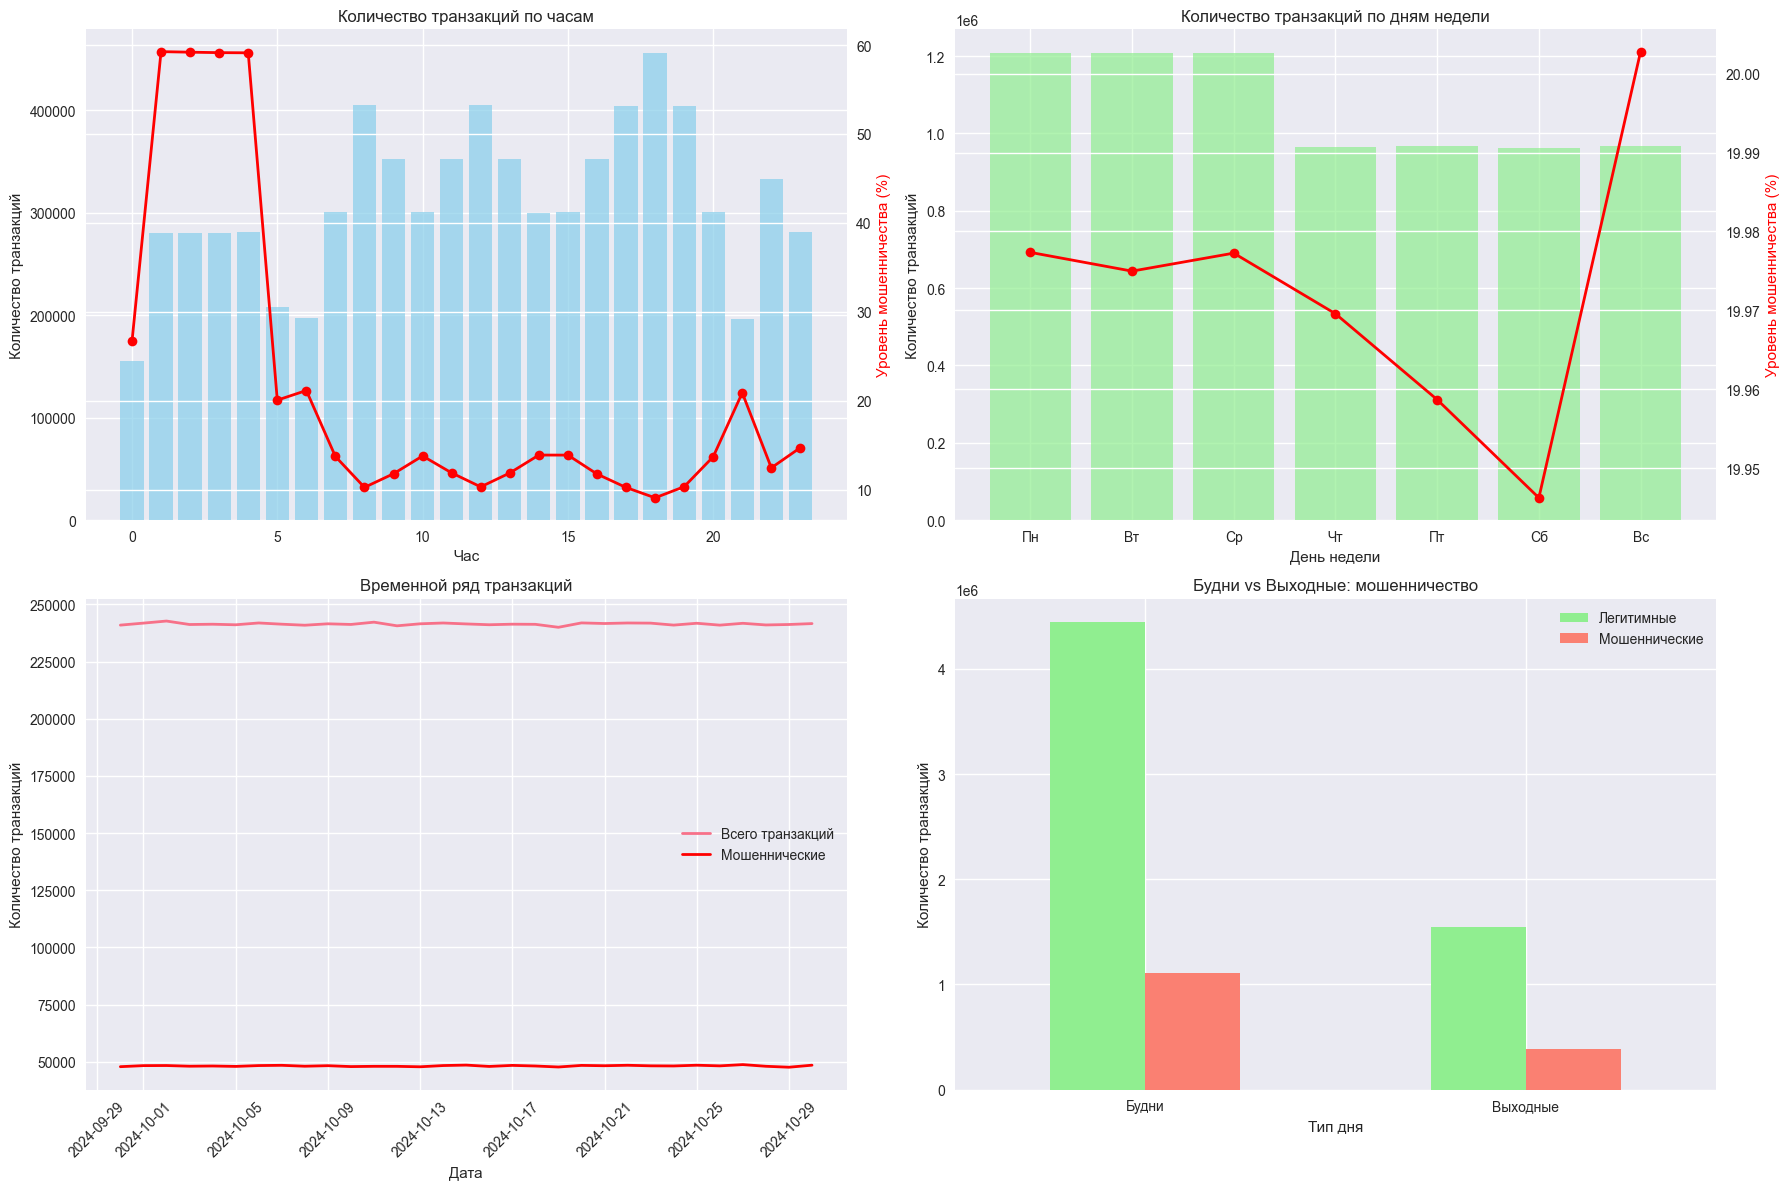

In [143]:
print("ВРЕМЕННОЙ АНАЛИЗ")
print("-" * 50)

# добавляем временные признаки для анализа
transact_df['hour'] = transact_df['timestamp'].dt.hour
transact_df['day_of_week'] = transact_df['timestamp'].dt.dayofweek
transact_df['date'] = transact_df['timestamp'].dt.date

# анализ по часам
hourly_stats = transact_df.groupby('hour').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)

print("Активность по часам (топ-5):")
hourly_fraud = hourly_stats.sort_values(('is_fraud', 'mean'), ascending=False)
for hour in hourly_fraud.head().index:
    count = hourly_fraud.loc[hour, ('transaction_id', 'count')]
    fraud_rate = hourly_fraud.loc[hour, ('is_fraud', 'mean')] * 100
    print(f"  {hour:02d}:00 - {count:,} транзакций, {fraud_rate:.2f}% мошенничества")

# анализ выходных дней
weekend_stats = transact_df.groupby('is_weekend').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)

print(f"\nАнализ выходных дней:")
for is_weekend, row in weekend_stats.iterrows():
    day_type = "Выходные" if is_weekend else "Будни"
    count = row[('transaction_id', 'count')]
    fraud_rate = row[('is_fraud', 'mean')] * 100
    print(f"  {day_type}: {count:,} транзакций, {fraud_rate:.2f}% мошенничества")

# временные графики
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# активность по часам
hourly_activity = transact_df.groupby('hour').size()
hourly_fraud_rate = transact_df.groupby('hour')['is_fraud'].mean() * 100

axes[0,0].bar(hourly_activity.index, hourly_activity.values, alpha=0.7, color='skyblue')
axes[0,0].set_title('Количество транзакций по часам')
axes[0,0].set_xlabel('Час')
axes[0,0].set_ylabel('Количество транзакций')

ax_twin = axes[0,0].twinx()
ax_twin.plot(hourly_fraud_rate.index, hourly_fraud_rate.values, color='red', linewidth=2, marker='o')
ax_twin.set_ylabel('Уровень мошенничества (%)', color='red')

# активность по дням недели
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
daily_activity = transact_df.groupby('day_of_week').size()
daily_fraud_rate = transact_df.groupby('day_of_week')['is_fraud'].mean() * 100

axes[0,1].bar(daily_activity.index, daily_activity.values, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Количество транзакций по дням недели')
axes[0,1].set_xlabel('День недели')
axes[0,1].set_ylabel('Количество транзакций')
axes[0,1].set_xticks(range(7))
axes[0,1].set_xticklabels(day_names)

ax_twin2 = axes[0,1].twinx()
ax_twin2.plot(daily_fraud_rate.index, daily_fraud_rate.values, color='red', linewidth=2, marker='o')
ax_twin2.set_ylabel('Уровень мошенничества (%)', color='red')

# временной ряд (по дням)
daily_counts = transact_df.groupby('date').size()
daily_fraud_counts = transact_df[transact_df['is_fraud']].groupby('date').size()

axes[1,0].plot(daily_counts.index, daily_counts.values, linewidth=2, label='Всего транзакций')
axes[1,0].plot(daily_fraud_counts.index, daily_fraud_counts.values, linewidth=2, color='red', label='Мошеннические')
axes[1,0].set_title('Временной ряд транзакций')
axes[1,0].set_xlabel('Дата')
axes[1,0].set_ylabel('Количество транзакций')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=45)

# сравнение будни vs выходные
weekend_comparison = transact_df.groupby(['is_weekend', 'is_fraud']).size().unstack()
weekend_comparison.plot(kind='bar', ax=axes[1,1], color=['lightgreen', 'salmon'])
axes[1,1].set_title('Будни vs Выходные: мошенничество')
axes[1,1].set_xlabel('Тип дня')
axes[1,1].set_ylabel('Количество транзакций')
axes[1,1].set_xticklabels(['Будни', 'Выходные'], rotation=0)
axes[1,1].legend(['Легитимные', 'Мошеннические'])

plt.tight_layout()
plt.show()

АНАЛИЗ ПО СТРАНАМ
--------------------------------------------------
Топ-10 стран по количеству транзакций:
  Nigeria: 849,840.0 транзакций, 35.14% мошенничества
  Brazil: 804,800.0 транзакций, 37.11% мошенничества
  Russia: 793,730.0 транзакций, 37.72% мошенничества
  Mexico: 785,704.0 транзакций, 38.03% мошенничества
  Singapore: 588,668.0 транзакций, 6.36% мошенничества
  France: 541,287.0 транзакций, 6.91% мошенничества
  UK: 538,493.0 транзакций, 6.94% мошенничества
  Canada: 532,632.0 транзакций, 7.00% мошенничества
  Japan: 527,393.0 транзакций, 7.13% мошенничества
  Germany: 524,464.0 транзакций, 7.09% мошенничества

Транзакции вне страны клиента:
  В своей стране: 5,073,605.0 транзакций, 2.49% мошенничества
  Вне страны: 2,410,161.0 транзакций, 56.78% мошенничества


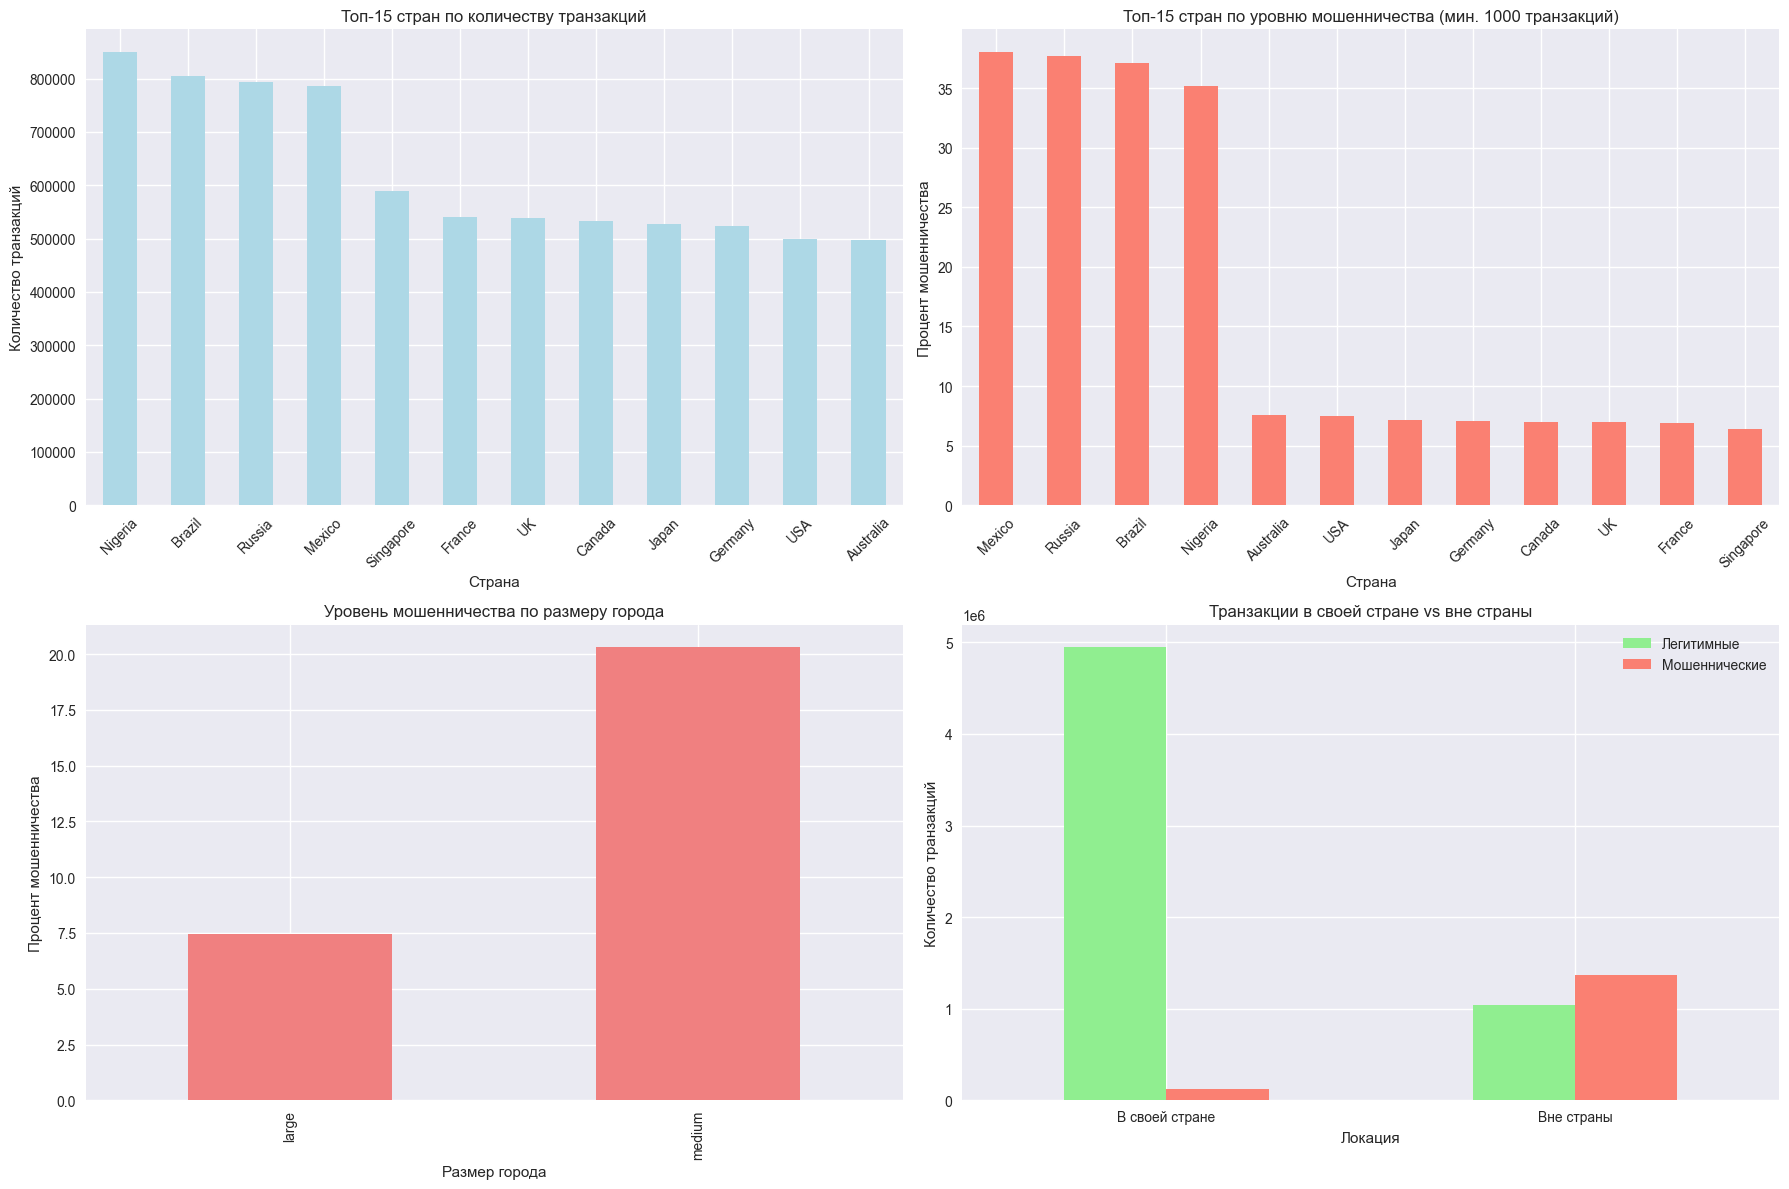

In [146]:
print("АНАЛИЗ ПО СТРАНАМ")
print("-" * 50)

print("Топ-10 стран по количеству транзакций:")
country_stats = transact_df.groupby('country').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)
country_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
country_stats = country_stats.sort_values('total_transactions', ascending=False)

for country, row in country_stats.head(10).iterrows():
    print(f"  {country}: {row['total_transactions']:,} транзакций, {row['fraud_rate']*100:.2f}% мошенничества")

# анализ транзакций вне страны клиента
outside_country_stats = transact_df.groupby('is_outside_home_country').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)

print(f"\nТранзакции вне страны клиента:")
for is_outside, row in outside_country_stats.iterrows():
    location_type = "Вне страны" if is_outside else "В своей стране"
    count = row[('transaction_id', 'count')]
    fraud_rate = row[('is_fraud', 'mean')] * 100
    print(f"  {location_type}: {count:,} транзакций, {fraud_rate:.2f}% мошенничества")

# визуализация географических данных
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# топ стран
country_stats.head(15)['total_transactions'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Топ-15 стран по количеству транзакций')
axes[0,0].set_xlabel('Страна')
axes[0,0].set_ylabel('Количество транзакций')
axes[0,0].tick_params(axis='x', rotation=45)

# уровень мошенничества по странам (мин 1000 транзакций)
high_volume_countries = country_stats[country_stats['total_transactions'] >= 1000]
fraud_by_country = high_volume_countries.sort_values('fraud_rate', ascending=False).head(15)
fraud_by_country['fraud_rate'].mul(100).plot(kind='bar', ax=axes[0,1], color='salmon')
axes[0,1].set_title('Топ-15 стран по уровню мошенничества (мин. 1000 транзакций)')
axes[0,1].set_xlabel('Страна')
axes[0,1].set_ylabel('Процент мошенничества')
axes[0,1].tick_params(axis='x', rotation=45)

# размер города
city_size_stats = transact_df.groupby('city_size').agg({
    'transaction_id': 'count',
    'is_fraud': 'mean'
}).round(4)
city_size_stats['is_fraud'].mul(100).plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Уровень мошенничества по размеру города')
axes[1,0].set_xlabel('Размер города')
axes[1,0].set_ylabel('Процент мошенничества')

# вне страны vs в стране
outside_comparison = transact_df.groupby(['is_outside_home_country', 'is_fraud']).size().unstack()
outside_comparison.plot(kind='bar', ax=axes[1,1], color=['lightgreen', 'salmon'])
axes[1,1].set_title('Транзакции в своей стране vs вне страны')
axes[1,1].set_xlabel('Локация')
axes[1,1].set_ylabel('Количество транзакций')
axes[1,1].set_xticklabels(['В своей стране', 'Вне страны'], rotation=0)
axes[1,1].legend(['Легитимные', 'Мошеннические'])

plt.tight_layout()
plt.show()

АНАЛИЗ ВЕНДОРОВ И КАТЕГОРИЙ
--------------------------------------------------
Топ-10 категорий вендоров:
  Healthcare: 936,770.0 транзакций, 19.94% мошенничества
  Restaurant: 936,178.0 транзакций, 19.97% мошенничества
  Entertainment: 936,173.0 транзакций, 19.96% мошенничества
  Retail: 935,883.0 транзакций, 19.94% мошенничества
  Travel: 935,790.0 транзакций, 20.03% мошенничества
  Gas: 935,401.0 транзакций, 19.97% мошенничества
  Grocery: 934,029.0 транзакций, 20.02% мошенничества
  Education: 933,542.0 транзакций, 19.95% мошенничества

Рискованные vs обычные вендоры:
  Обычные: 5,611,803.0 транзакций, 19.96% мошенничества
  Рискованные: 1,871,963.0 транзакций, 20.00% мошенничества


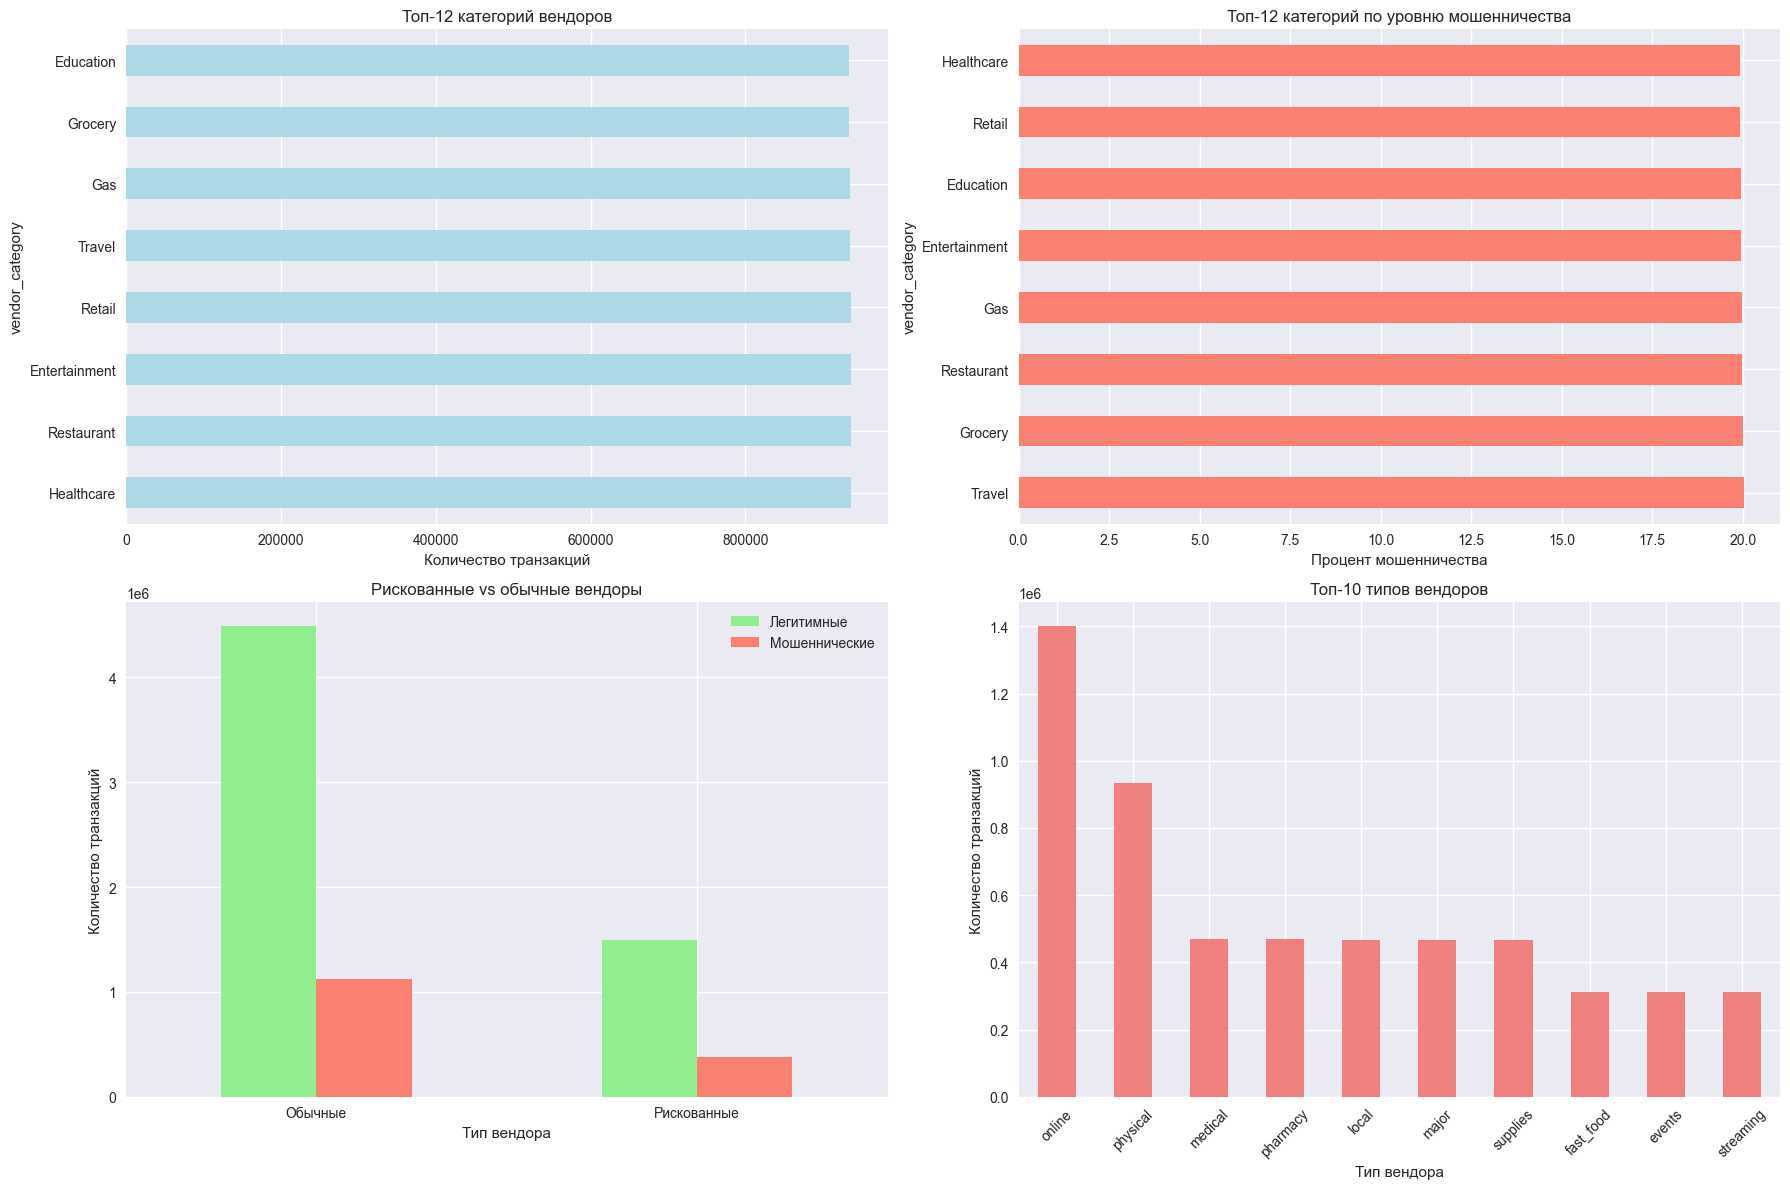

In [161]:
print("АНАЛИЗ ВЕНДОРОВ И КАТЕГОРИЙ")
print("-" * 50)

print("Топ-10 категорий вендоров:")
vendor_category_stats = transact_df.groupby('vendor_category').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)
vendor_category_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
vendor_category_stats = vendor_category_stats.sort_values('total_transactions', ascending=False)

for category, row in vendor_category_stats.head(10).iterrows():
    print(f"  {category}: {row['total_transactions']:,} транзакций, {row['fraud_rate']*100:.2f}% мошенничества")

# анализ рискованных вендоров
risk_vendor_stats = transact_df.groupby('is_high_risk_vendor').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)

print(f"\nРискованные vs обычные вендоры:")
for is_risky, row in risk_vendor_stats.iterrows():
    vendor_type = "Рискованные" if is_risky else "Обычные"
    count = row[('transaction_id', 'count')]
    fraud_rate = row[('is_fraud', 'mean')] * 100
    print(f"  {vendor_type}: {count:,} транзакций, {fraud_rate:.2f}% мошенничества")

# визуализация вендоров
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# категории вендоров
vendor_category_stats.head(12)['total_transactions'].plot(kind='barh', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Топ-12 категорий вендоров')
axes[0,0].set_xlabel('Количество транзакций')

# уровень мошенничества по категориям
vendor_fraud_rate = vendor_category_stats.sort_values('fraud_rate', ascending=False).head(12)
vendor_fraud_rate['fraud_rate'].mul(100).plot(kind='barh', ax=axes[0,1], color='salmon')
axes[0,1].set_title('Топ-12 категорий по уровню мошенничества')
axes[0,1].set_xlabel('Процент мошенничества')

# рискованные вендоры
risk_comparison = transact_df.groupby(['is_high_risk_vendor', 'is_fraud']).size().unstack()
risk_comparison.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'salmon'])
axes[1,0].set_title('Рискованные vs обычные вендоры')
axes[1,0].set_xlabel('Тип вендора')
axes[1,0].set_ylabel('Количество транзакций')
axes[1,0].set_xticklabels(['Обычные', 'Рискованные'], rotation=0)
axes[1,0].legend(['Легитимные', 'Мошеннические'])

# типы вендоров
vendor_type_stats = transact_df['vendor_type'].value_counts().head(10)
vendor_type_stats.plot(kind='bar', ax=axes[1,1], color='lightcoral')
axes[1,1].set_title('Топ-10 типов вендоров')
axes[1,1].set_xlabel('Тип вендора')
axes[1,1].set_ylabel('Количество транзакций')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout();

АНАЛИЗ УСТРОЙСТВ И КАНАЛОВ
--------------------------------------------------
Топ-10 устройств:
  Edge: 1,189,560.0 транзакций, 11.68% мошенничества
  iOS App: 1,143,461.0 транзакций, 12.27% мошенничества
  Chrome: 1,132,384.0 транзакций, 12.37% мошенничества
  Android App: 1,126,117.0 транзакций, 12.51% мошенничества
  Firefox: 1,120,952.0 транзакций, 12.68% мошенничества
  Safari: 1,120,245.0 транзакций, 12.62% мошенничества
  Chip Reader: 217,324.0 транзакций, 100.00% мошенничества
  Magnetic Stripe: 217,204.0 транзакций, 100.00% мошенничества
  NFC Payment: 216,519.0 транзакций, 100.00% мошенничества

Топ-5 каналов:
  web: 4,563,141.0 транзакций, 12.33% мошенничества
  mobile: 2,269,578.0 транзакций, 12.39% мошенничества
  pos: 651,047.0 транзакций, 100.00% мошенничества

Присутствие карты:
  Карта отсутствует: 6,832,719.0 транзакций, 12.35% мошенничества
  Карта присутствует: 651,047.0 транзакций, 100.00% мошенничества


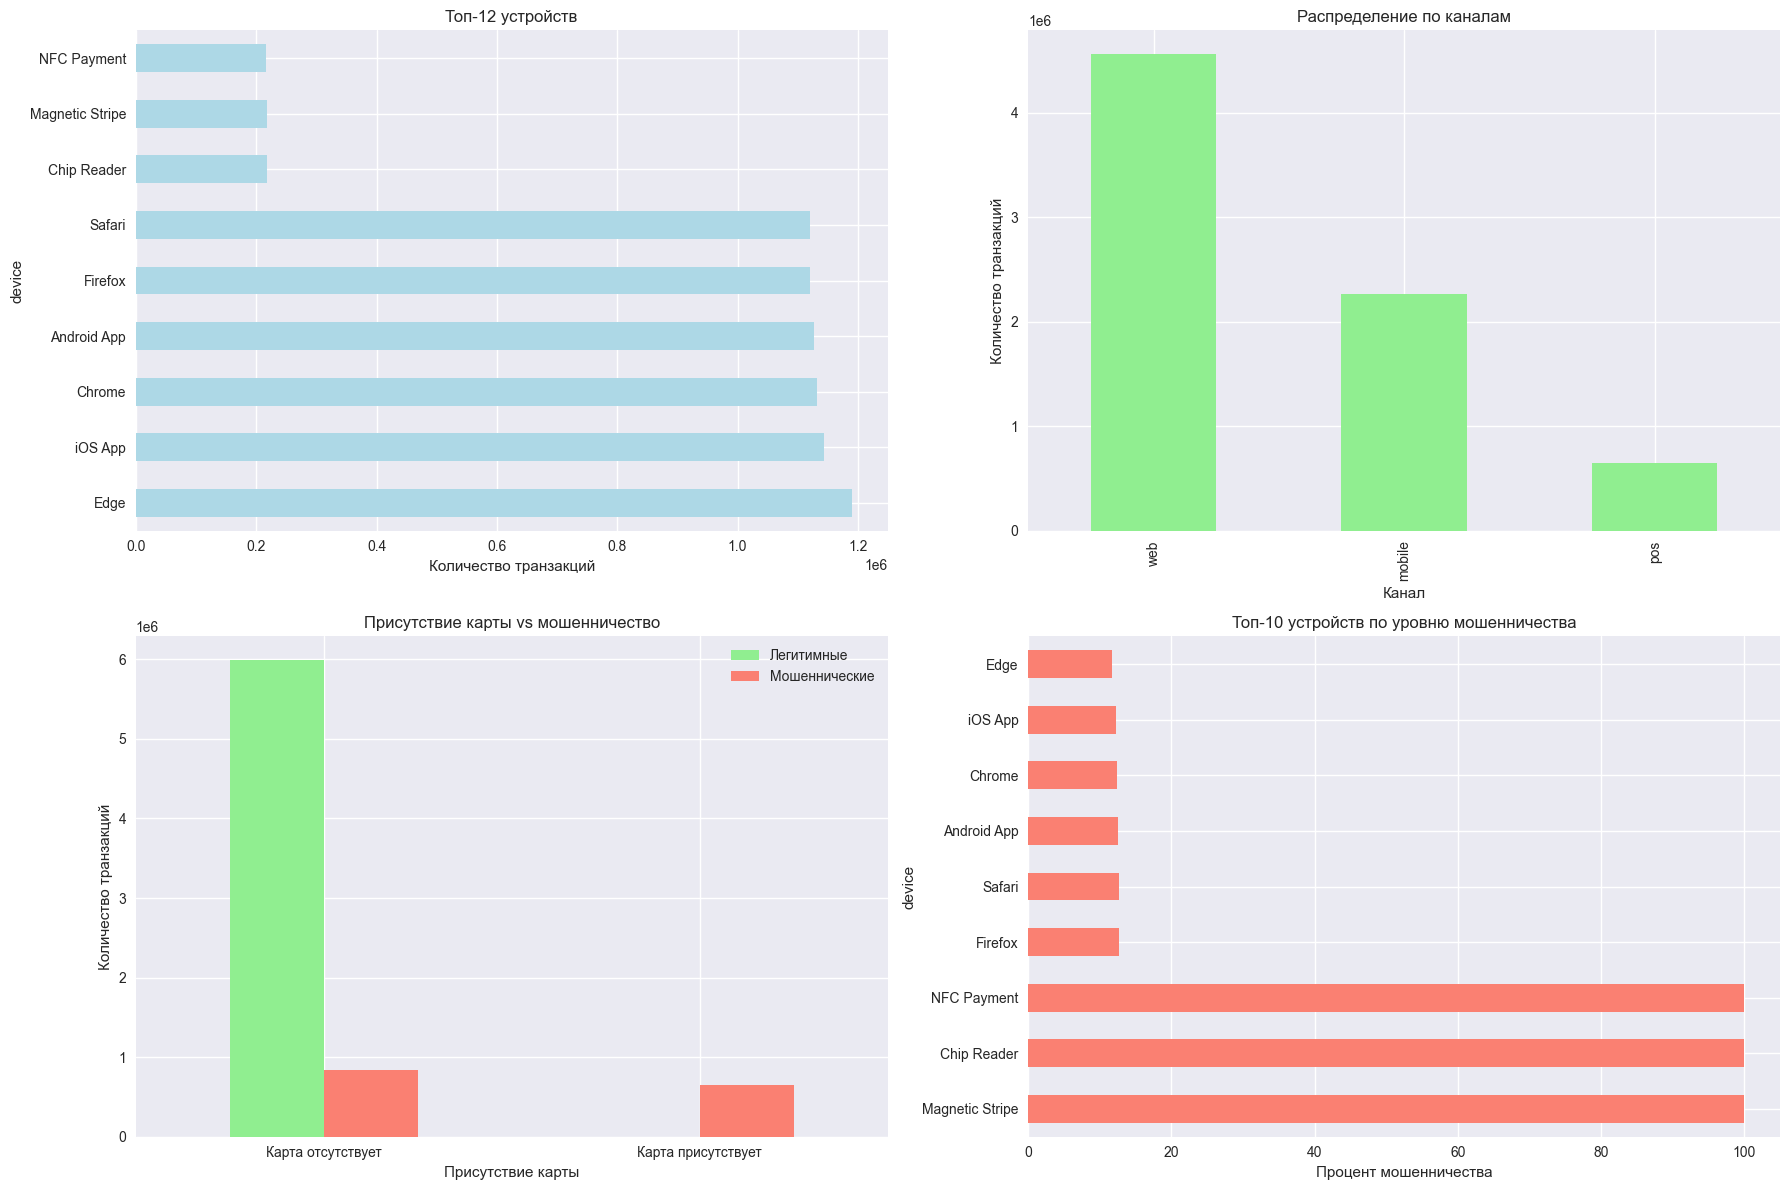

In [152]:
print("АНАЛИЗ УСТРОЙСТВ И КАНАЛОВ")
print("-" * 50)

print("Топ-10 устройств:")
device_stats = transact_df.groupby('device').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)
device_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
device_stats = device_stats.sort_values('total_transactions', ascending=False)

for device, row in device_stats.head(10).iterrows():
    print(f"  {device}: {row['total_transactions']:,} транзакций, {row['fraud_rate']*100:.2f}% мошенничества")

print(f"\nТоп-5 каналов:")
channel_stats = transact_df.groupby('channel').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)
channel_stats.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
channel_stats = channel_stats.sort_values('total_transactions', ascending=False)

for channel, row in channel_stats.iterrows():
    print(f"  {channel}: {row['total_transactions']:,} транзакций, {row['fraud_rate']*100:.2f}% мошенничества")

# анализ присутствия карты
card_present_stats = transact_df.groupby('is_card_present').agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).round(4)

print(f"\nПрисутствие карты:")
for is_present, row in card_present_stats.iterrows():
    presence = "Карта присутствует" if is_present else "Карта отсутствует"
    count = row[('transaction_id', 'count')]
    fraud_rate = row[('is_fraud', 'mean')] * 100
    print(f"  {presence}: {count:,} транзакций, {fraud_rate:.2f}% мошенничества")

# визуализация устройств и каналов
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# топ устройства
device_stats.head(12)['total_transactions'].plot(kind='barh', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Топ-12 устройств')
axes[0,0].set_xlabel('Количество транзакций')

# каналы
channel_stats['total_transactions'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Распределение по каналам')
axes[0,1].set_xlabel('Канал')
axes[0,1].set_ylabel('Количество транзакций')

# присутствие карты
card_present_comparison = transact_df.groupby(['is_card_present', 'is_fraud']).size().unstack()
card_present_comparison.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'salmon'])
axes[1,0].set_title('Присутствие карты vs мошенничество')
axes[1,0].set_xlabel('Присутствие карты')
axes[1,0].set_ylabel('Количество транзакций')
axes[1,0].set_xticklabels(['Карта отсутствует', 'Карта присутствует'], rotation=0)
axes[1,0].legend(['Легитимные', 'Мошеннические'])

# уровень мошенничества по устройствам (топ по мошенничеству)
device_fraud_rate = device_stats[device_stats['total_transactions'] >= 1000]
device_fraud_top = device_fraud_rate.sort_values('fraud_rate', ascending=False).head(10)
device_fraud_top['fraud_rate'].mul(100).plot(kind='barh', ax=axes[1,1], color='salmon')
axes[1,1].set_title('Топ-10 устройств по уровню мошенничества')
axes[1,1].set_xlabel('Процент мошенничества')

plt.tight_layout()
plt.show()

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
--------------------------------------------------
Топ корреляции с мошенничеством:
  is_outside_home_country: 0.6345
  is_card_present: 0.6179
  amount: 0.1993
  is_high_risk_vendor: 0.0004
  is_weekend: 0.0000


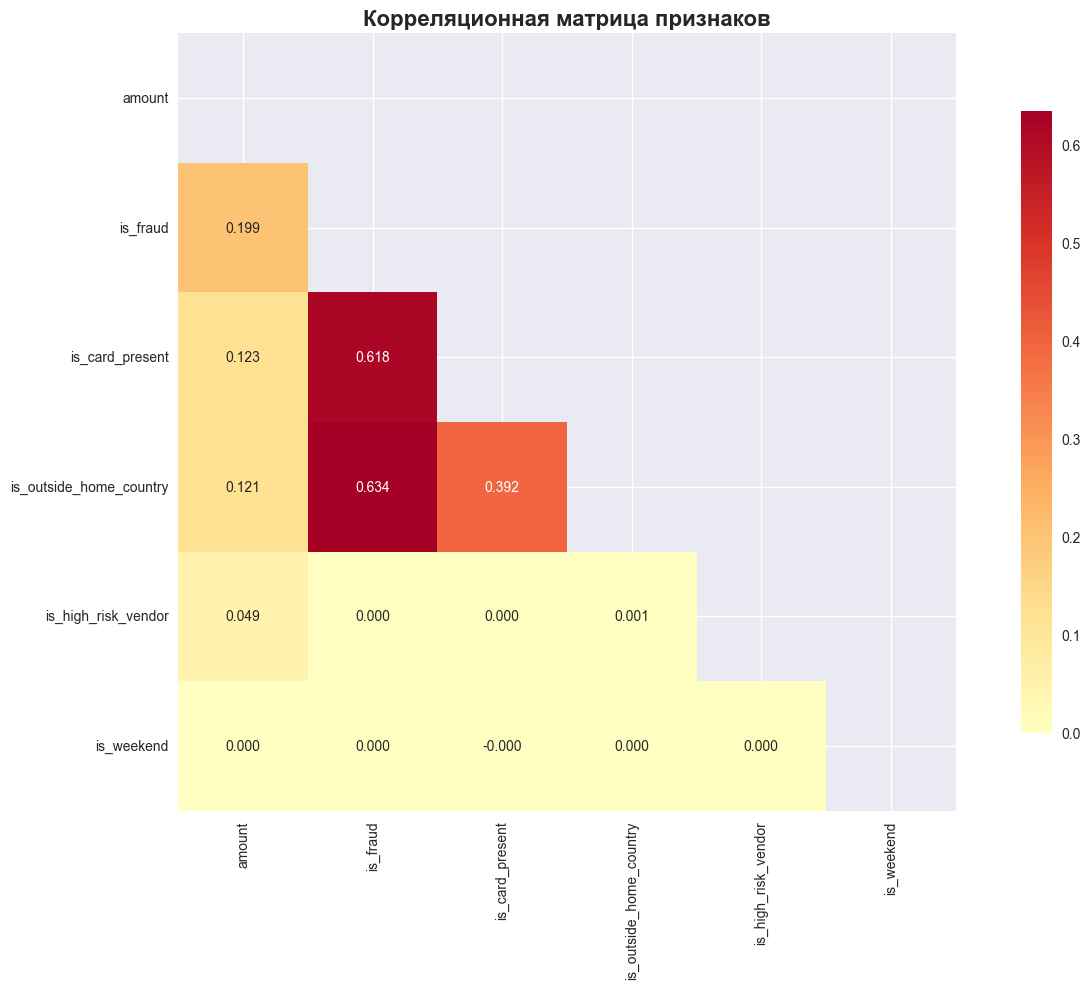

In [157]:
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("-" * 50)

# выбираем числовые столбцы для корреляции
numeric_cols = ['amount', 'is_fraud', 'is_card_present', 'is_outside_home_country', 
               'is_high_risk_vendor', 'is_weekend']

# преобразуем булевые значения в численные
correlation_data = transact_df[numeric_cols].copy()
for col in ['is_fraud', 'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend']:
    correlation_data[col] = correlation_data[col].astype(int)

# вычисляем корреляцию
correlation_matrix = correlation_data.corr()

print("Топ корреляции с мошенничеством:")
fraud_correlations = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
for feature, corr in fraud_correlations.items():
    if feature != 'is_fraud':
        print(f"  {feature}: {corr:.4f}")

# визуализация корреляционной матрицы
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица признаков', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show();


In [160]:
print("SUMMARY")
print("=" * 60)
print(f"Общие характеристики датасета:")
print(f"  • Всего транзакций: {len(transact_df):,}")
print(f"  • Уникальных клиентов: {transact_df['customer_id'].nunique():,}")
print(f"  • Период: {(transact_df['timestamp'].max() - transact_df['timestamp'].min()).days} дней")
print(f"  • Объем данных: {transact_df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")

print(f"\nКлючевые находки по мошенничеству:")
fraud_rate = transact_df['is_fraud'].mean() * 100
print(f"  • Общий уровень мошенничества: {fraud_rate:.2f}%")
print(f"  • Соотношение легитимных к мошенническим: {fraud_stats[False]:,} : {fraud_stats[True]:,}")

# топ факторы риска
print(f"\nТоп факторы риска (корреляция с мошенничеством):")
for feature, corr in fraud_correlations.head(6).items():
    if feature != 'is_fraud':
        print(f"  • {feature}: {corr:.4f}")

print(f"\nГеографическое распределение:")
print(f"  • Стран: {transact_df['country'].nunique()}")
print(f"  • Городов: {transact_df['city'].nunique()}")
print(f"  • Транзакций вне страны клиента: {transact_df['is_outside_home_country'].sum():,} ({transact_df['is_outside_home_country'].mean()*100:.1f}%)")

print(f"\nТехнологические характеристики:")
print(f"  • Уникальных устройств: {transact_df['device'].nunique()}")
print(f"  • Каналов: {transact_df['channel'].nunique()}")
print(f"  • Отпечатков устройств: {transact_df['device_fingerprint'].nunique():,}")

print(f"\nВремя и активность:")
most_active_hour = hourly_activity.idxmax()
peak_fraud_hour = hourly_fraud_rate.idxmax()
print(f"  • Самый активный час: {most_active_hour:02d}:00 ({hourly_activity.max():,} транзакций)")
print(f"  • Пик мошенничества: {peak_fraud_hour:02d}:00 ({hourly_fraud_rate.max():.2f}%)")
print(f"  • Выходные дни составляют: {transact_df['is_weekend'].sum():,} транзакций ({transact_df['is_weekend'].mean()*100:.1f}%)")

SUMMARY
Общие характеристики датасета:
  • Всего транзакций: 7,483,766
  • Уникальных клиентов: 4,869
  • Период: 30 дней
  • Объем данных: 6.58 GB

Ключевые находки по мошенничеству:
  • Общий уровень мошенничества: 19.97%
  • Соотношение легитимных к мошенническим: 5,989,047 : 1,494,719

Топ факторы риска (корреляция с мошенничеством):
  • is_outside_home_country: 0.6345
  • is_card_present: 0.6179
  • amount: 0.1993
  • is_high_risk_vendor: 0.0004
  • is_weekend: 0.0000

Географическое распределение:
  • Стран: 12
  • Городов: 11
  • Транзакций вне страны клиента: 2,410,161 (32.2%)

Технологические характеристики:
  • Уникальных устройств: 9
  • Каналов: 3
  • Отпечатков устройств: 785,462

Время и активность:
  • Самый активный час: 18:00 (456,393 транзакций)
  • Пик мошенничества: 01:00 (59.26%)
  • Выходные дни составляют: 1,929,663 транзакций (25.8%)
